In [298]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [112]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [303]:
# File to Load 
mouse_path= os.path.join('data','mouse_drug_data.csv')
clinical_path = os.path.join('data','clinicaltrial_data.csv')

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data_df = pd.read_csv(mouse_path)
clinical_data_df = pd.read_csv(clinical_path)

# Combine the data into a single dataset
combined_df = pd.merge(clinical_data_df,mouse_data_df, how='left', on=['Mouse ID', 'Mouse ID'])


# Display the data table for preview
combined_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [304]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint:
mean_tumor_vol = combined_df.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)']

# Convert to DataFrame
mean_tumor_vol = pd.DataFrame(mean_tumor_vol)

# Preview DataFrame
mean_tumor_vol = mean_tumor_vol.reset_index()
mean_tumor_vol

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [115]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_standard_error = combined_df.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)']
# Convert to DataFrame
tumor_standard_error = pd.DataFrame(tumor_standard_error)
# Preview DataFrame
tumor_standard_error.reset_index(inplace=True)
tumor_standard_error

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [311]:
# Minor Data Munging to Re-Format the tumor_pivot_df Data Frame
tumor_pivot_df = mean_tumor_vol.pivot(index= "Timepoint", values="Tumor Volume (mm3)", columns="Drug")

# Preview that Reformatting worked
tumor_pivot_df.head(10)


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [310]:
# Minor Data Munging to Re-Format the tumor_standard_error Data Frame
tumor_error_df = tumor_standard_error.pivot(index= 'Timepoint', values='Tumor Volume (mm3)', columns='Drug')

# Preview that Reformatting worked
tumor_error_df.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [236]:
#first, create the df for the treatments we are analyzing:(Capomulin, Infubinol, Ketapril, and Placebo)
tumor_treatment_mean_df = tumor_pivot_df[['Capomulin', 'Ceftamin', 'Infubinol','Ketapril','Naftisol', 'Placebo','Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']]

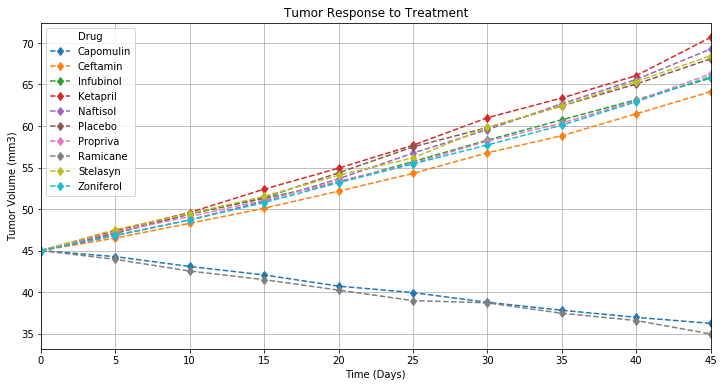

In [302]:
# Generate the Plot (with Error Bars)
tumor_treatment_mean_df.plot(kind='line', use_index=True, grid=True, marker='d', linewidth=1.5, linestyle="dashed", figsize = (12, 6))

plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
# Save the Figure
plt.savefig("Tumor Response to Treatment.png")


## Metastatic Response to Treatment

In [120]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint(similar as mean tumor volume but replae volume for met. sites) 
mean_met_site = combined_df.groupby(['Drug', 'Timepoint']).mean()['Metastatic Sites']
# Convert to DataFrame
mean_met_site = pd.DataFrame(mean_met_site)
# Preview DataFrame
mean_met_site.reset_index(inplace=True)
mean_met_site 

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
...,...,...,...
95,Zoniferol,25,1.687500
96,Zoniferol,30,1.933333
97,Zoniferol,35,2.285714
98,Zoniferol,40,2.785714


In [121]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metsites_standard_error = combined_df.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites']
# Convert to DataFrame
metsites_standard_error = pd.DataFrame(metsites_standard_error)
# Preview DataFrame
metsites_standard_error.reset_index(inplace=True)
metsites_standard_error 

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
...,...,...,...
95,Zoniferol,25,0.236621
96,Zoniferol,30,0.248168
97,Zoniferol,35,0.285714
98,Zoniferol,40,0.299791


In [124]:
# Minor Data Munging to Re-Format the tumor_pivot_df Data Frame
metastatic_pivot_df = mean_met_site.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')

# Preview that Reformatting worked
metastatic_pivot_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [305]:
#first, create the df for the treatments we are analyzing:
meta_treatment_mean_df = metastatic_pivot_df[['Capomulin', 'Ceftamin', 'Infubinol','Ketapril','Naftisol', 'Placebo','Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']]

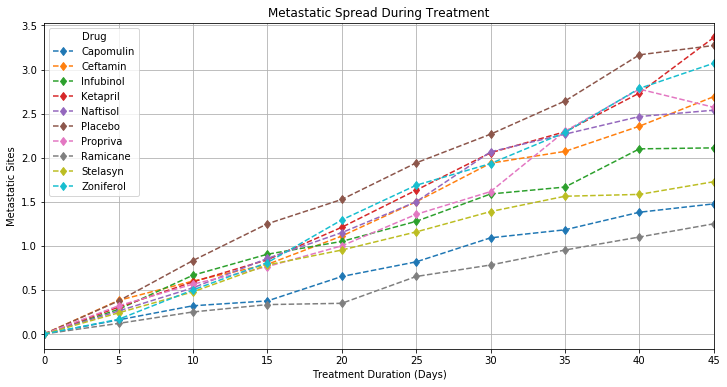

In [301]:
# Generate the Plot (with Error Bars)
meta_treatment_mean_df.plot(kind='line', use_index=True, grid=True, marker='d', linewidth=1.5, linestyle='dashed', figsize = (12, 6))

plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Metastatic Sites')

# Save the Figure
plt.savefig('Metastatic Spread During Treatment.png')


## Survival Rates

In [155]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_mice_count = combined_df.groupby(['Drug', 'Timepoint'])['Mouse ID'].count()
# Convert to DataFrame
survival_mice_count = pd.DataFrame(survival_mice_count)
survival_mice_count.reset_index(inplace=True)
# Preview DataFrame
survival_mice_count

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [158]:
# Minor Data Munging to Re-Format the Data Frames
survival_pivot_df = survival_mice_count.pivot(index='Timepoint',columns='Drug',values='Mouse ID')
# Preview the Data Frame
survival_pivot_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [242]:
#Create df for the 4 treatments:
survival_treatments_df = survival_pivot_df[['Capomulin', 'Ceftamin', 'Infubinol','Ketapril','Naftisol', 'Placebo','Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']]

In [243]:
#Begin the process of converting data in df to % by calculating the initial mice count:
count_of_mice = survival_treatments_df.loc[0,:]

In [244]:
#Do a For loop to calculate the % at different time points for each treatment then divide by the count_of_mice:
for column in survival_treatments_df:
    survival_treatments_df[column] = survival_treatments_df[column] / count_of_mice.loc[column] * 100 
    
#Preview the dataframe with percentages
survival_treatments_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,53.846154,92.0,73.076923,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.000000,92.0,69.230769,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.461538,84.0,61.538462,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,34.615385,80.0,46.153846,56.0


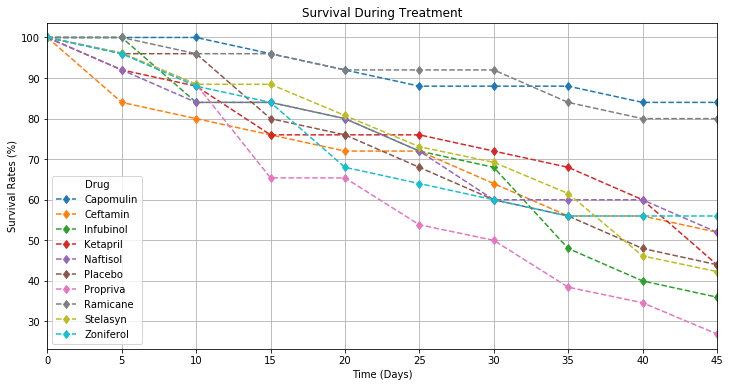

In [300]:
# Generate the Plot (Accounting for percentages)
survival_treatments_df.plot(kind='line', use_index=True, grid=True, marker='d', linewidth=1.5, linestyle="dashed", figsize = (12, 6))

plt.title('Survival During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rates (%)')

# Save the Figure
plt.savefig('Survival_Rates.png')
# Show the Figure
plt.show()

## Summary Bar Graph

In [183]:
# Calculate the percent changes for each drug
percent_changes = (tumor_pivot_df.iloc[-1]/(tumor_pivot_df.iloc[0])-1)*100
# Display the data to confirm
percent_changes

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

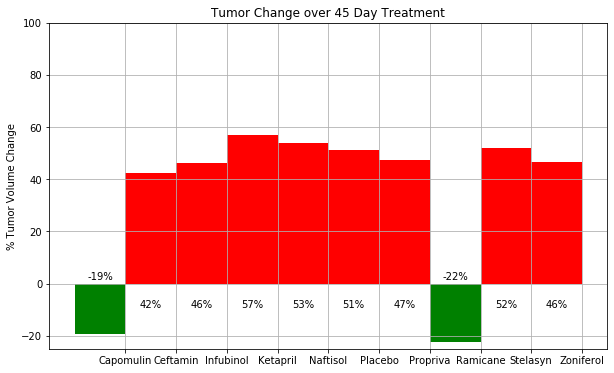

In [308]:
# Splice the data between passing and failing drugs
passing_drugs = percent_changes < 0

#Format: 
treatment_drug_list = ['Capomulin', 'Ceftamin', 'Infubinol','Ketapril','Naftisol', 'Placebo','Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
percent_change_list = [(percent_changes[Drug])for Drug in treatment_drug_list]
change_plt = plt.bar(treatment_drug_list,percent_change_list,width=-1,align='edge',color=passing_drugs.map({True:'g',False:'r'}))
plt.grid()
plt.ylim(-25,100)
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change over 45 Day Treatment')
plt.gcf().set_size_inches(10, 6)


# Use functions to label the percentages of changes
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            label_position = -10
        else:
            label_position = 1
        plt.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height)+'%',color='black',
                ha='center', va='bottom')
                
# Call functions to implement the function calls
autolabel(change_plt)

# Save the Figure
plt.savefig(os.path.join('tumor_change.png'))


# Observations

The Tumor Response to Treatment scatter plot shows that there are two drugs where the tumor volume decreases over time for the treatment. Capomulin and Ramicane both demostrate a negative corralation between tumor volume(mm3) and time(days). The tumor size in the mice that did the Capomulin treatment decreased from 44.26 mm3 to 36.23 mm3 in a period of 45 days. Also, the tumor size in the mice that did the Ramicane treatment decreased from 43.94 mm3 to 34.95 mm3 in a period of 45 days. The rest of the treatments had a positive correlation where the tumor volume increased.


When analyzing the Survival During Treatment plot it is evident that Propriva had the lowest survival rate in comparison to other drug treatments. At about day 13, the surviving number of mice doing the Propriva treatment began to decrease significantly. At day 45 only 26.92% of the entire pool of mice for this treatment had survived. In the other hand, Capomulin and Ramicane had the highest survival rate with 84% for Capomulin and 80% for Ramicane.


The Summary Bar Graph compares the total % tumor volume change for each drug across the full 45 days. The red and green colors make it very clear that out of all the treatment drugs across the study, Capomulin and Ramicane were the most successful drug treatments overall. Capomulin helped the tumor volume decrease a total of 19% while Ramicane was at 22%. In conclusion, we have significant data that shows that Capomulin and Ramicane are the best treatments out of the 10 drugs screened to squamous cell carcinoma (SCC).